<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

In [1]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import requests

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')

In [3]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
query_3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [5]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Проблем с типами данных не обнаружено, также отсутствуют пропуски.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br> ок, данные загружены и просмотрены)

создадим функции для построения сводной таблицы со значениями города и количества рейсов,а также для отображения данных значений на графике.

In [7]:
def city_flights(df):
    return (
        df
            .pivot_table(index='city', values='average_flights')
            .sort_values('average_flights', ascending=False)
    )

In [8]:
def bar_plot(df, size):
    (
        df
            .plot(kind='bar', y='average_flights', figsize=(size, 5), legend=False)
            .set(xlabel='город', ylabel='average_flights')
        
    )
    plt.title("Города и количество рейсов", fontsize = 20)
    plt.show()

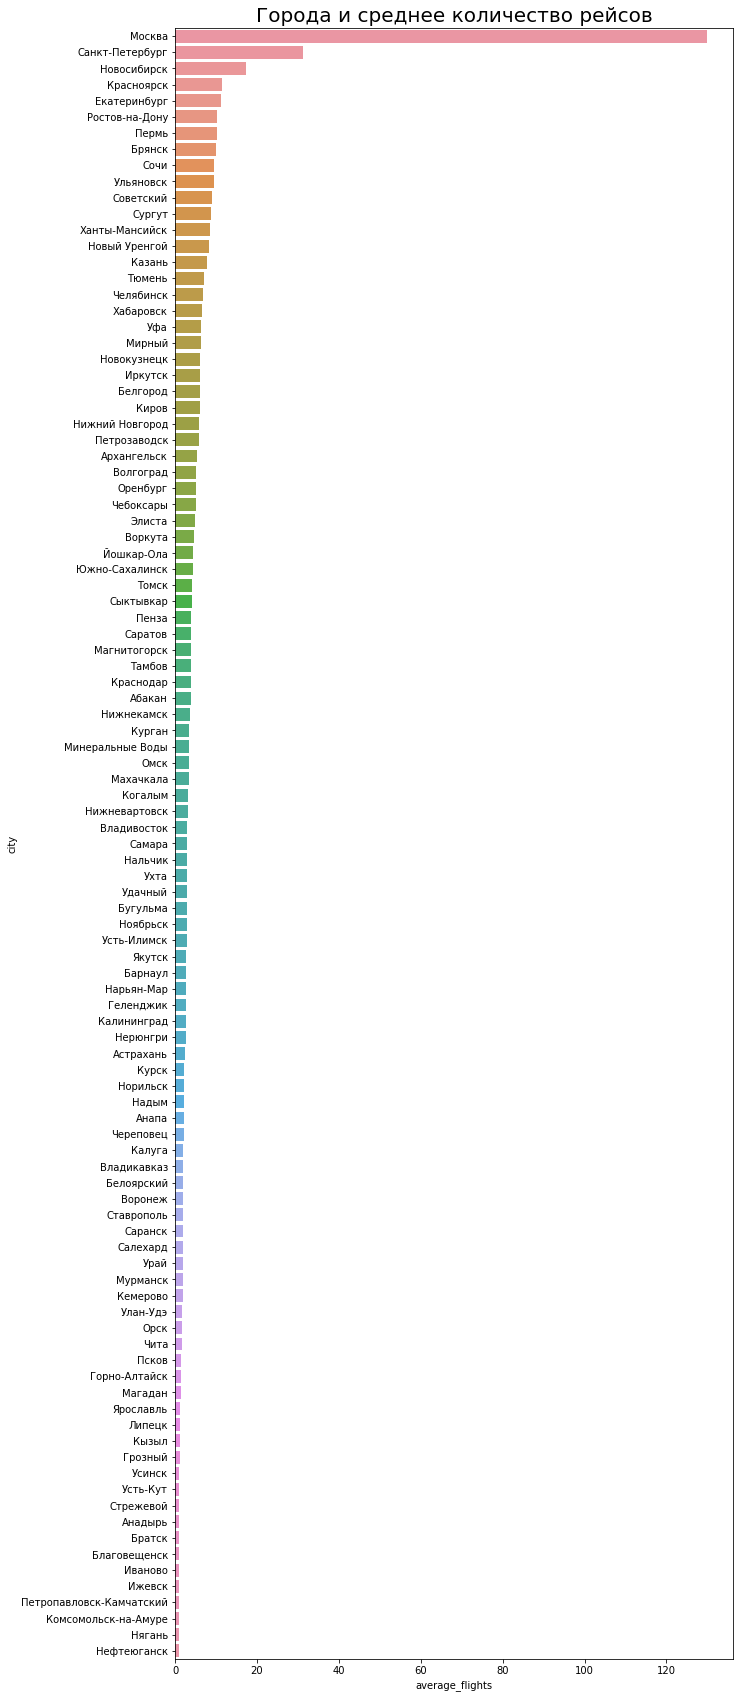

In [9]:
plt.figure(figsize = (10,30))
sns.barplot(x='average_flights',
            y='city',
            data=query_3.sort_values(by='average_flights', ascending=False))
plt.title("Города и среднее количество рейсов", fontsize = 20);

In [10]:
query_3.sort_values('average_flights', ascending=False).head(30)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Для сокращения списка городов все значения average_flights ниже 7 объединим, взяв их среднее  значение.

In [11]:
df_query_3 = query_3.loc[query_3['average_flights']<7]
df_query_3_mean = df_query_3['average_flights'].mean()
df_query_3_mean

3.047001543734103

In [12]:
new_query_3 = query_3.loc[query_3['average_flights']>7]
new_query_3 = new_query_3.append(pd.DataFrame([['Другие города', df_query_3_mean]], columns = new_query_3.columns),ignore_index=True)

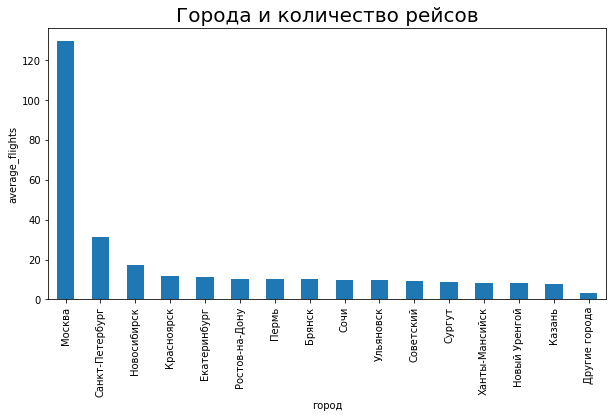

In [13]:
bar_plot(city_flights(new_query_3),10)

Отобразим на графике топ 10 городов по количеству рейсов

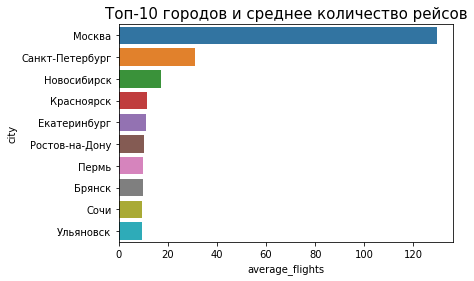

In [14]:
sns.barplot(x='average_flights',
            y='city',
            data=query_3.sort_values(by='average_flights', ascending=False).head(10))
plt.title("Топ-10 городов и среднее количество рейсов", fontsize = 15);

Можем видеть, что больше всего рейсов из Москвы и таких крупных городов, как Санкт-Петербург и Новосибирск, что вполне ожидаемо.

Также отобразим на графике модели самолётов и количество рейсов

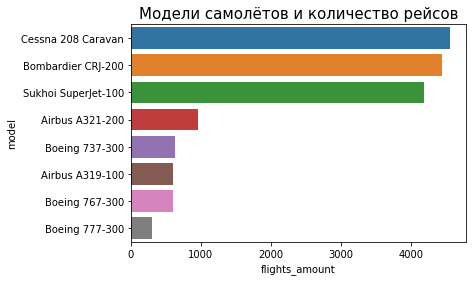

In [15]:
sns.barplot(x='flights_amount',
            y='model',
            data=query_1.sort_values(by='flights_amount', ascending=False))
plt.title("Модели самолётов и количество рейсов", fontsize = 15);

Можем наблюдать, что больше всего полетов совершали самолеты малой авиации и пассаржиские с малой дальностью.

**Вывод** 

Таким образом, мы наблюдаем повышенный спрос на вполне ожидаемые направления, то есть крупные города РФ, где, помимо всего прочего, повышенная концентрация крупных культурных событий. Особенно выделяется Москва. Однако, как видим, "большими партиями" люди, преимущественно, не летают, то есть люди летают часто, но малыми группами и, преимущественно, на малые расстояния. Вместе с тем, корректных выводов о наличии зависимоости спроса на те или иные направления от наличия там какого-либо фестиваля в конкретный день мы сделать не можем, так как отсутствует соответствующий набор данных, содержащий информацию о фестивалях.

# Общий вывод

В нашем распоряжении были 2 набора данных, а именно:

query_1.csv. В нём содержится такая информация:

model — модель самолета;

flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года.

В датасете query_3.csv  содержится следующая информация:

city — город;

average_flights — среднее количество рейсов, прибывающих в город (city) за день в сентябре 2018 года.

Для этих двух наборов данных мы сделали следующее:

Сначала изучили данные в этих датасетах, проверить типы данных на корректность. Проблем с типами данных не обнаружили, а также не обнаружили пропусков.

Далее нами был построен график, в котором отображены города и среднее количество рейсов для каждого города, при этом для удобства анализа мы сократили список городов путем объединения всех значений average_flights ниже 7, получив их среднее  значение.

Далее мы  выбрали топ-10 городов по количеству рейсов. В итоге обнаружили, что лидирует по количеству рейсов Москва, атакже такие крупные города, как Санкт-Петербург и Новосибирск, что вполне ожидаемо.

Также мы построили график моделей самолетов с отображением количества полетов для каждой модели.

сделать выводы по каждому из графиков, пояснить результат.

Мы увидели, что больше всего полетов совершали самолеты малой авиации и пассаржиские с малой дальностью полетов.

Таким образом, мы наблюдаем повышенный спрос на вполне ожидаемые направления, то есть крупные города РФ, где, помимо всего прочего, повышенная концентрация крупных культурных событий. Особенно выделяется Москва. Однако, как видим, "большими партиями" люди, преимущественно, не летают, то есть люди летают часто, но малыми группами и, преимущественно, на малые расстояния. Вместе с тем, корректных выводов о наличии зависимоости спроса на те или иные направления от наличия там какого-либо фестиваля в конкретный день мы сделать не можем, так как отсутствует соответствующий набор данных, содержащий информацию о фестивалях.